In [1]:
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [2]:
train_data = pd.read_csv(r'data_set\train.csv')

In [3]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [115]:
train_data['CLASS'].value_counts()

1    586
0    571
Name: CLASS, dtype: int64

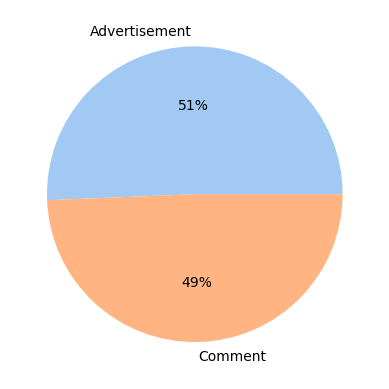

In [120]:
train_data['CLASS'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

label = ['Advertisement','Comment']

colors = sns.color_palette('pastel')[0:5]
plt.pie(train_data['CLASS'].value_counts(),labels = label , colors = colors, autopct='%.0f%%')
plt.show()

In [124]:
train_comment = np.array(train_data['CONTENT'])
train_label = np.array(train_data['CLASS'])

seed = 123
np.random.seed(seed)
np.random.shuffle(train_comment)
np.random.seed(seed)
np.random.shuffle(train_label)

In [125]:
print(len(train_comment))
print(len(train_label))


1157
1157


In [7]:
#Total Number of Samples:
samples = len(train_label)
#Total Number of classes:
unique, count = np.unique(train_label, return_counts=True)
result = np.column_stack((unique, count))
classes = len(unique)

In [8]:
print(result)

[[  0 571]
 [  1 586]]


In [9]:
#Median number of words in comments column of the corpus
word_count = [len(comment.split()) for comment in train_comment]
print(word_count[1])
median = np.median(word_count)
print(median)

3
8.0


In [10]:
word_list = []
for comment in train_comment:
    for word in comment.split():
        word_list.append(word)

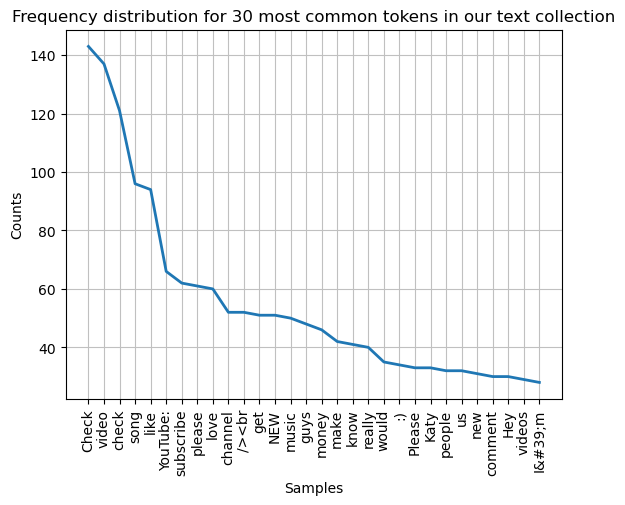

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [11]:
stop_words = set(stopwords.words('english'))

filtered_word_list = [w for w in word_list if (not w.lower() in stop_words and len(w) >= 2)]         
fdist_filtered = FreqDist(filtered_word_list)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')

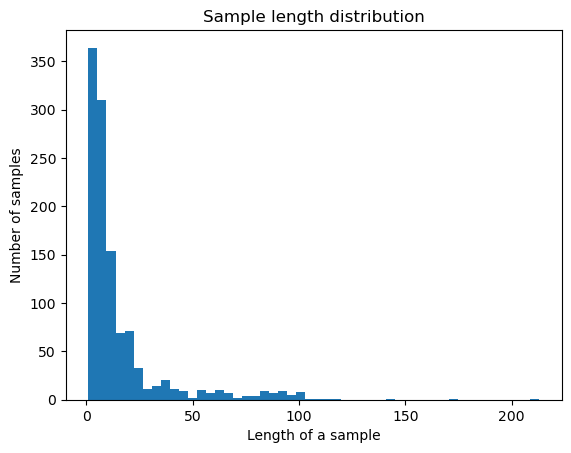

In [12]:
plt.hist([len(comment.split()) for comment in train_comment], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [13]:
data_frame = pd.DataFrame(list(zip(train_comment, train_label)), columns=['Comment', 'Label'])

In [14]:
data_frame.head()

,Comment,Label
0,I'm not a big fan of the song but this video i...,0
1,Wow...5 years<br />﻿,0
2,i hate this music. fucking singer and every ko...,0
3,CHECK OUT THIS DOPE CHANNEL! phenomenallyri...,1
4,super﻿,0


In [15]:
data_frame['Label'].value_counts()

1    586
0    571
Name: Label, dtype: int64

In [16]:
y = data_frame.Label.values

In [78]:
test_data = pd.read_csv(r'data_set\test.csv')
data_frame_test = test_data['CONTENT']

print(data_frame['Comment'].shape)
print(data_frame_test.shape)

(1157,)
(799,)


In [86]:
df1 = data_frame['Comment']
df2 = data_frame_test

total_X = df1.append(df2, ignore_index=True)

total_X.head()

0    I'm not a big fan of the song but this video i...
1                                 Wow...5 years<br />﻿
2    i hate this music. fucking singer and every ko...
3    CHECK OUT THIS DOPE CHANNEL!    phenomenallyri...
4                                               super﻿
dtype: object

In [87]:
sw = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
X = vectorizer.fit_transform(total_X).toarray()

In [94]:
X.shape

(1956, 4328)

In [128]:
X_train = X[:1157]
X_test = X[1157:]
print(X_train.shape)
print(y.shape)
print(X_test.shape)

(1157, 4328)
(1157,)
(799, 4328)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [98]:
model.fit(X_train, y)

LogisticRegression(random_state=0, solver='liblinear')

In [100]:
y_predict = model.predict(X_test)

In [101]:
print(y_predict.shape)

(799,)


In [104]:
df_predict = pd.DataFrame(y_predict, columns = ['label'])

In [107]:
df_predict.head()

,label
0,1
1,1
2,1
3,0
4,1
